# Source:
https://medium.com/@okanyenigun/building-a-neural-network-from-scratch-in-python-a-step-by-step-guide-8f8cab064c8a#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImFjM2UzZTU1ODExMWM3YzdhNzVjNWI2NTEzNGQyMmY2M2VlMDA2ZDAiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMDIwNTYzNTI4MDEwMDk2NjgyMzYiLCJlbWFpbCI6Im8ubGF2YWtoYW1zZWhAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsIm5iZiI6MTcxNDc1NjE1NywibmFtZSI6Ik9taWQgTGF2YWtoYW1zZWgiLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUNnOG9jSTN3UnIzOFhlYmxXYkt5VmVjU3l5d0NWbHFiV2xjMktIUW9EVkZtLTRQZ3JEaDZ3PXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6Ik9taWQiLCJmYW1pbHlfbmFtZSI6IkxhdmFraGFtc2VoIiwiaWF0IjoxNzE0NzU2NDU3LCJleHAiOjE3MTQ3NjAwNTcsImp0aSI6IjEwNTQ1Njg4OTM4MDZjZTQzZGMwZWJkNDJhOTk0ZDBiZTc1M2FjYWMifQ.oT-f6T05K1Y1QEWrq3oOq0v3E5oT3BLk9PIsV1re18UQsYCr7x0dXcqN1wiesQWx8gFlYgauM6LeCxaGHzjKRQtBX_mnij0qSRCXm1WbaeDtoEHnkjVMerScqSvvORS5ZFQFzaA6BVRhFSTHM9r6vpqzD2p3gsujdV62MqRdNivY1HXVYgL1KsjZwUwglO_KuXyUDg9uV40trO9akZy1L8NfR49RCTKD1XWp2SeyWJaYi9aLtPKGGrbo2ztHX-IjDrmNzvnrWY2CLIa6CugfOv563_1hglDSbXUiQ4GgLg10pTRZdNBohgMH_mnFC8gRontMz1K00DX7MfUf8ytWBw


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_func(x,y, title):
    # helper function to plot activation functions
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('activation(x)')
    plt.grid(True)
    plt.show()

x = np.linspace(-10, 10, 100)

### Sigmoid:

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

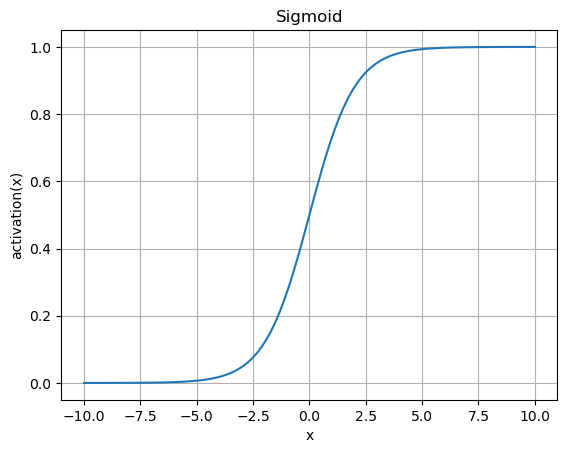

In [6]:
plot_func(x,sigmoid(x),'Sigmoid')

In [7]:
#2. Relu
def relu(x):
    return np.maximum(0, x)

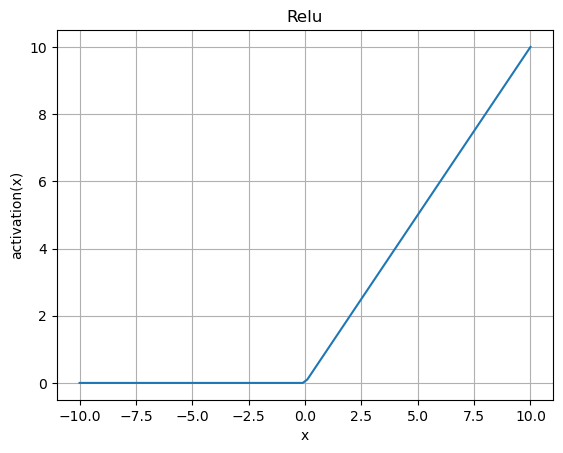

In [9]:
plot_func(x,relu(x),'Relu')

### 3.Leaky Relu:
The Leaky ReLU activation function is a variation of the ReLU function that allows a small, non-zero output for negative input values, preventing complete suppression of information.

In [10]:
def leaky_relu(x, alpha=0.1):
    return np.maximum(alpha*x, x)

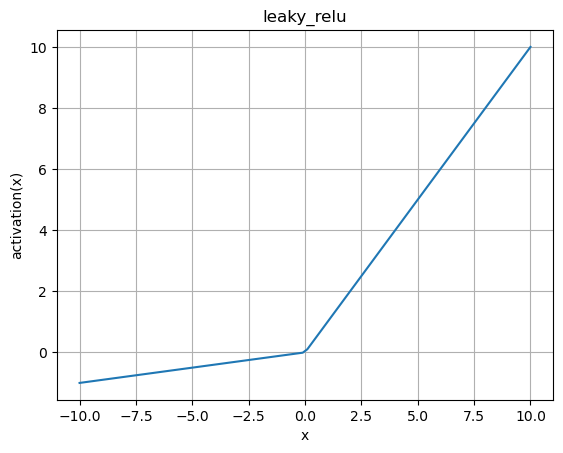

In [17]:
plot_func(x,leaky_relu(x),'leaky_relu')

In [12]:
#4.
def tanh(x):
    return np.tanh(x)

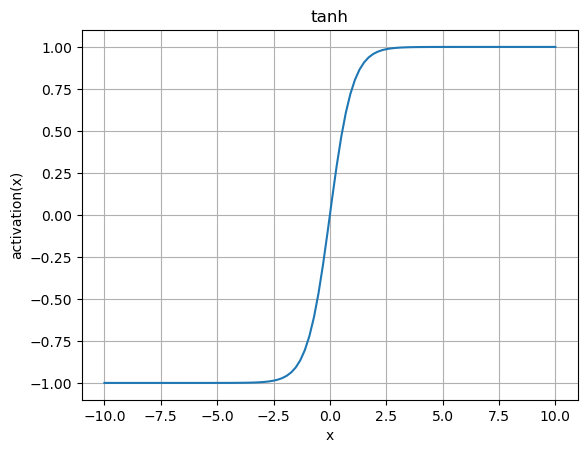

In [13]:
plot_func(x,tanh(x),'tanh')

In [15]:
#5.
def softmax(x):
    exp_scores = np.exp(x)
    return exp_scores / np.sum(exp_scores)

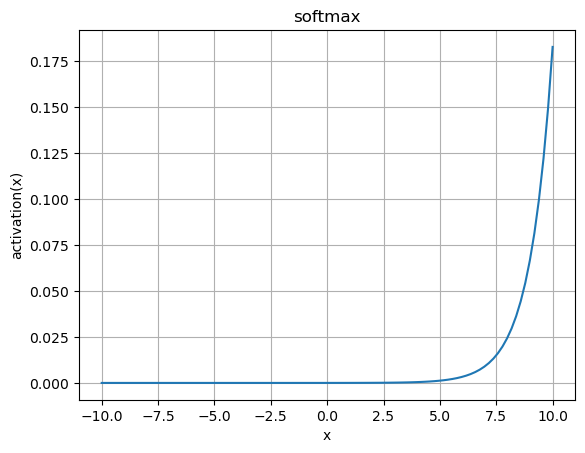

In [16]:
plot_func(x,softmax(x),'softmax')

## Multiple Layers
Certainly, solely incorporating the ReLU activation function would significantly amplify the error. This is primarily because it would produce identical predictions for any input below zero. To address this issue, we introduce multiple layers in our neural network. For instance, a neural network with two layers can be represented by the equation y^ = w2 * relu(w1 * x + b1) + b2.

In [18]:
prediction = lambda x, w1=.2, b=1.99: x * w1 + b

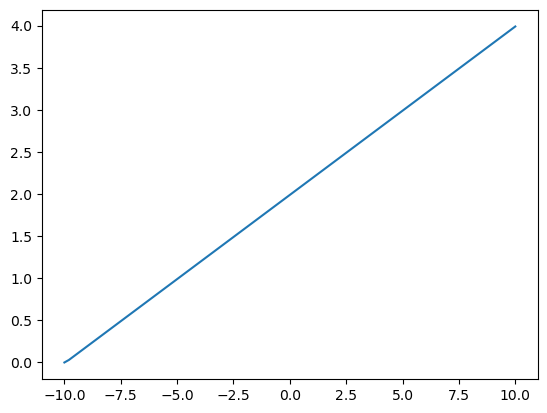

In [19]:
layer1_1 = np.maximum(0, prediction(x))
plt.plot(x, layer1_1)

What happens if we add another unit?



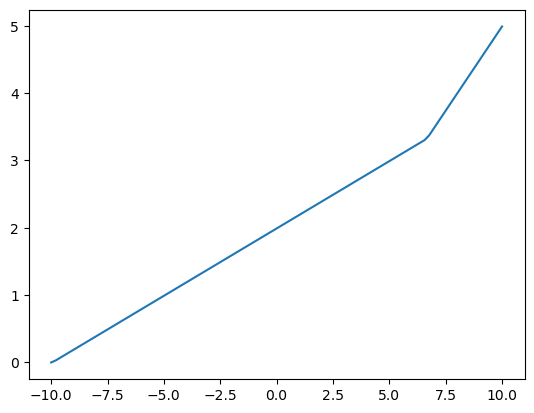

In [24]:
layer1_2 = np.maximum(0, prediction(x, .3, -2)) 
plt.plot(x, layer1_1+layer1_2)

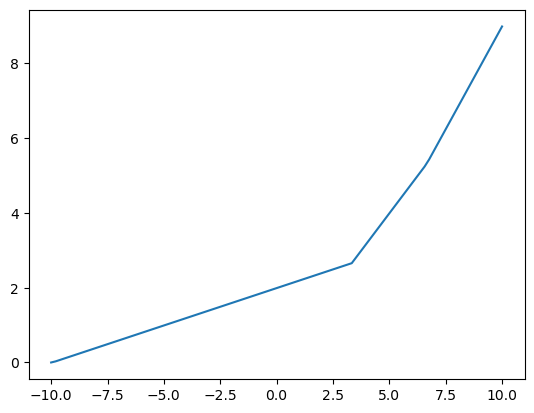

In [25]:
layer1_3 = np.maximum(0, prediction(x, .6, -2))
plt.plot(x, layer1_1+layer1_2+layer1_3)

By increasing the number of units, we observe the emergence of a more pronounced non-linear relationship

## Calculating Outputs:

As evident from the above, the output of one component serves as the input for another. Matrix multiplication is employed to compute the outputs in this process.

In [38]:
#! pip install -q tensor-sensor



In [40]:
x_input

array([[ 10],
       [ 20],
       [-20],
       [-40],
       [ -3]])

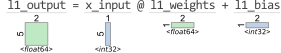

In [39]:
from tsensor import explain as exp

x_input = np.array([[10], [20], [-20], [-40], [-3]])

# 1x2 weight matrix
l1_weights = np.array([[.73, .2]])

# 1x2 bias matrix
l1_bias = np.array([[4, 2]])

# output
with exp() as c:
    l1_output = x_input @ l1_weights + l1_bias

In [41]:
l1_output

array([[ 11.3 ,   4.  ],
       [ 18.6 ,   6.  ],
       [-10.6 ,  -2.  ],
       [-25.2 ,  -6.  ],
       [  1.81,   1.4 ]])

In [43]:
l1_activated = relu(l1_output)
l1_activated

array([[11.3 ,  4.  ],
       [18.6 ,  6.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 1.81,  1.4 ]])

In [53]:
l2_weights.shape

(2, 1)

In [59]:
# 1x2 weight matrix
l2_weights = np.array([[.74], [21]])

# 1x2 bias matrix
l2_bias = np.array([5])

In [63]:
output=l1_activated @l2_weights+l2_bias
output

array([[ 97.362 ],
       [144.764 ],
       [  5.    ],
       [  5.    ],
       [ 35.7394]])

Essentially, this is the fundamental process of making predictions in neural networks. It involves utilizing the weight matrix and bias matrix for each layer, performing repeated multiplications with the weight matrix, incorporating the bias, applying a non-linearity, and repeating this process for each layer. To accommodate additional units within a layer, you can simply add more columns to the weight matrix.

In [62]:
def calculate_mse(actual, predicted):
    return (actual - predicted) ** 2

actual = np.array([[9], [13], [5], [-2], [-1]])

print(calculate_mse(actual,output))

[[ 7807.843044  ]
 [17361.751696  ]
 [    0.        ]
 [   49.        ]
 [ 1349.78351236]]


During gradient descent, it is essential to determine the gradient of the loss function, which represents the rate of change. This gradient indicates how the loss function alters as we modify the input values.

In [65]:
def gradient_mse(actual, predicted):
    return predicted - actual
#u=y'-y
#1/n* 2*u*u'=almost=u
print(gradient_mse(actual,output))


[[ 88.362 ]
 [131.764 ]
 [  0.    ]
 [  7.    ]
 [ 36.7394]]


This information guides the necessary adjustment to our prediction in order to minimize the error effectively.

# 2nd sourse 

In [68]:
pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.6/377.0 MB 12.2 MB/s eta 0:00:31
   ---------------------------------------- 2.3/377.0 MB 24.3 MB/s eta 0:00:16
   ---------------------------------------- 3.3/377.0 MB 29.8 MB/s eta 0:00:13
   ---------------------------------------- 4.4/377.0 MB 23.3 MB/s eta 0:00:16
    --------------------------------------- 6.8/377.0 MB 28.9 MB/s eta 0:00:13
    --------------------------------------- 7.9/377.0 MB 28.1 MB/s eta 0:00:14
    --------------------------------------- 8.9/377.0 MB 26.9 MB/s eta 0:00:14
   - -------------------------------------- 9.9/377.0 MB 26.3 MB/s eta 0:00:14
   - -------------------------------------- 11.4/377.0 MB 28.5 MB/s eta 0:00:13
   - -------------------------------------- 12.5/377.0 MB 27.3 MB

In [69]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Generate random data for demonstration (100 houses)
np.random.seed(42)
X = np.random.rand(100, 1) * 5  # Random features (e.g., number of rooms)
y = 3 * X + np.random.randn(100, 1) + 5  # Price of the house (e.g., in $1000s)


In [70]:

# Splitting the dataset into training and testing data
train_data = X[:80]
train_labels = y[:80]
test_data = X[80:]
test_labels = y[80:]


In [104]:

# Building the model
# Constructs a simple neural network using Keras with one dense layer. This is a basic linear regression model represented 
#as a neural network.
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,))  # A single neuron; expecting 1 input feature
])

# Compiling the model
#Specifies the optimizer (sgd for stochastic gradient descent) 
#and loss function (mean_squared_error which is typical for regression tasks
model.compile(optimizer='sgd', loss='mean_squared_error')

# Training the model
model.fit(train_data, train_labels, epochs=50)

# Evaluate the model on test data
print("Evaluation on the test data:")
model.evaluate(test_data, test_labels)

# Predicting new house prices
new_data = np.array([[4]])  # Predict price for a house with 4 rooms
predicted_price = model.predict(new_data)
print("Predicted price for a house with 4 rooms:", predicted_price)


C:\Users\omidl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 159.9581
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 54.2068 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.4504 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.5810   
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0075 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.7718 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2923  
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.0620 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.9170 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8033 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7029 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6093  
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5203 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4347 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3522  
Epoch 16/50
3/3 

In [76]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate random data (100 data points)
X = np.random.rand(100, 1) * 5  # Random features (e.g., number of rooms)
y = 3 * X + np.random.randn(100, 1) + 5  # Price of the house (e.g., in $1000s)

# Splitting the dataset into training, validation, and testing data
train_data = X[:60]
train_labels = y[:60]
val_data = X[60:80]
val_labels = y[60:80]
test_data = X[80:]
test_labels = y[80:]

# Building the model
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,))  # A single neuron; expecting 1 input feature
])

# Compiling the model
model.compile(optimizer='sgd', loss='mean_squared_error')

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 705ms/step - loss: 234.1787 - val_loss: 122.2725
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 113.4529 - val_loss: 60.7833
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 56.0413 - val_loss: 31.1154
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 28.7935 - val_loss: 16.7359
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 15.8919 - val_loss: 9.7166
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 9.7972 - val_loss: 6.2513
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 6.9210 - val_loss: 4.5095
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 5.5590 - val_loss: 3.6087
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 4.9042 - val_loss: 3.1219
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 4.5764 - val_loss: 2.8416
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 4.3974 - val_loss: 2.6661
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss:

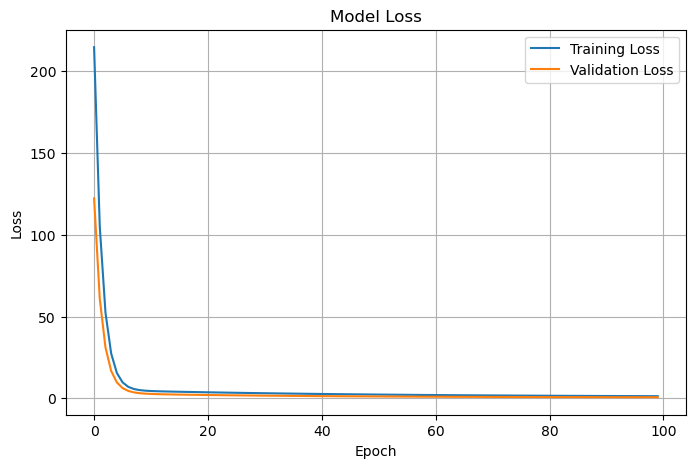

In [78]:
# Callback for early stopping
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
'''Early Stopping Callback: This callback monitors the validation loss (monitor='val_loss'). 
If the validation loss does not improve for a given number of epochs (patience=5), 
it stops the training early and restores the model weights from the epoch with the best validation loss.
This helps prevent overfitting and saves training time.'''

# Training the model with validation
history = model.fit(train_data, train_labels, epochs=100, validation_data=(val_data, val_labels), callbacks=[early_stopping_callback])

# Evaluate the model on test data
print("Evaluation on the test data:")
model.evaluate(test_data, test_labels)

# Plotting training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [79]:

# Predicting new house prices
new_data = np.array([[4]])  # Predict price for a house with 4 rooms
predicted_price = model.predict(new_data)
print("Predicted price for a house with 4 rooms:", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted price for a house with 4 rooms: [[16.960205]]


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step - loss: 99.0448 - val_loss: 53.9131
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 49.8839 - val_loss: 28.3594
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 26.5744 - val_loss: 15.9499
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 15.5464 - val_loss: 9.8702
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 10.3362 - val_loss: 6.8485
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 7.8705 - val_loss: 5.3108
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 6.6918 - val_loss: 4.4983
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 6.1113 - val_loss: 4.0434
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 5.8056 - val_loss: 3.7676
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 5.6238 - val_loss: 3.5832
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 5.4964 - val_loss: 3.4468
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step -

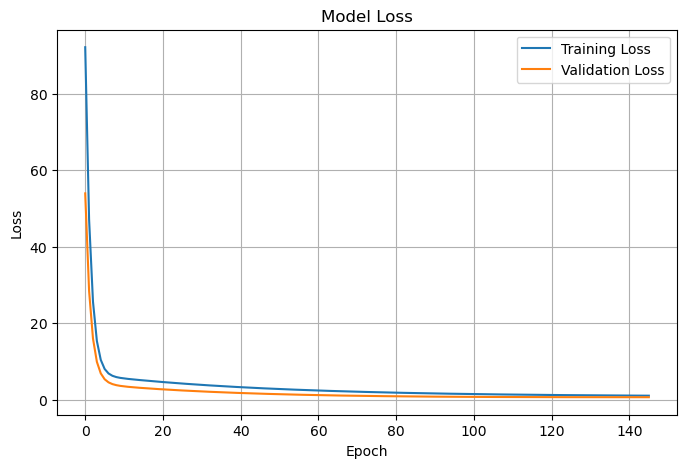

In [88]:
# Building the model
model = keras.Sequential([
    keras.layers.Dense(units=1, input_shape=(1,))  # A single neuron; expecting 1 input feature
])

# Compiling the model
model.compile(optimizer='sgd', loss='mean_squared_error')
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Training the model with validation
history = model.fit(train_data, train_labels, epochs=1000, validation_data=(val_data, val_labels), callbacks=[early_stopping_callback])

# Evaluate the model on test data
print("Evaluation on the test data:")
model.evaluate(test_data, test_labels)

# Plotting training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# 3rd

We can use the MLPRegressor from scikit-learn, a popular machine learning library in Python, to build a neural network model similar to the one you created with Keras. This library is generally used for simpler neural network tasks and provides an easy-to-use interface for multi-layer perceptrons (MLPs), which can perform both classification and regression.

In [99]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Seed for reproducibility
np.random.seed(42)

# Generate random data (100 data points)
X = np.random.rand(100, 1) * 5  # Random features (e.g., number of rooms)
y = 3 * X + np.random.randn(100, 1).ravel() + 5  # Price of the house (e.g., in $1000s)

# Splitting the dataset into training and testing data
train_data = X[:80]
train_labels = y[:80]
test_data = X[80:]
test_labels = y[80:]

# Standardizing the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


In [100]:

# Building and training the model
model = MLPRegressor(hidden_layer_sizes=(10,),  # 10 neurons in the hidden layer
                     activation='relu',         # ReLU activation function
                     solver='adam',             # Default solver is Adam
                     learning_rate_init=0.01,   # Initial learning rate
                     max_iter=1000,             # Maximum number of iterations
                     random_state=42)           # Random state for reproducibility

In [101]:


model.fit(train_data_scaled, train_labels)

# Predicting the test set results
predictions = model.predict(test_data_scaled)

# Evaluate the model
mse = mean_squared_error(test_labels, predictions)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.017644005992505426


In [103]:
model.predict(new_data_scaled)

array([[17.10854947, 16.72084799, 17.11426095, 15.03058474, 16.80074376,
        17.37865595, 18.50178198, 16.50098913, 16.21039758, 16.51666618,
        17.93945988, 17.35255276, 16.49251572, 17.53659191, 17.11796883,
        17.99265285, 16.31625941, 16.69377741, 16.6275581 , 15.55358211,
        17.31641929, 17.28268388, 17.02601467, 16.78690641, 15.60184884,
        16.59826309, 16.67678081, 16.21764013, 16.86000741, 17.42709753,
        18.91406307, 17.19749844, 17.27814554, 16.9474111 , 15.09690051,
        16.99474462, 17.0797411 , 19.49264639, 16.82774837, 17.32405389,
        16.98456581, 15.84808206, 18.1669166 , 17.77476111, 17.8150867 ,
        16.10786593, 18.42938556, 15.61619497, 17.6112735 , 19.22062148,
        16.02748918, 16.45564137, 17.12112441, 16.51623054, 15.46533682,
        17.09042265, 15.95492879, 17.49524782, 16.09913842, 18.57571223,
        16.23491951, 16.70062319, 17.83617934, 15.78549082, 17.24935858,
        18.333111  , 15.40940962, 17.20591004, 17.2

In [102]:
# Predicting new house prices
new_data = np.array([[4]])  # Predict price for a house with 4 rooms
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)
print("Predicted price for a house with 4 rooms:", predicted_price)


Predicted price for a house with 4 rooms: [[17.10854947 16.72084799 17.11426095 15.03058474 16.80074376 17.37865595
  18.50178198 16.50098913 16.21039758 16.51666618 17.93945988 17.35255276
  16.49251572 17.53659191 17.11796883 17.99265285 16.31625941 16.69377741
  16.6275581  15.55358211 17.31641929 17.28268388 17.02601467 16.78690641
  15.60184884 16.59826309 16.67678081 16.21764013 16.86000741 17.42709753
  18.91406307 17.19749844 17.27814554 16.9474111  15.09690051 16.99474462
  17.0797411  19.49264639 16.82774837 17.32405389 16.98456581 15.84808206
  18.1669166  17.77476111 17.8150867  16.10786593 18.42938556 15.61619497
  17.6112735  19.22062148 16.02748918 16.45564137 17.12112441 16.51623054
  15.46533682 17.09042265 15.95492879 17.49524782 16.09913842 18.57571223
  16.23491951 16.70062319 17.83617934 15.78549082 17.24935858 18.333111
  15.40940962 17.20591004 17.28067153 17.80679589 15.78179268 15.69793918
  17.54222559 17.3187303  17.27358317 17.3682698  16.34042926 17.2526493